#This project is the part of **theblackpearls** internship
NAME: BALANITHISH.G

PROJECT: Car Price Prediction Using machine learning


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
car = pd.read_csv("car data.csv")


In [8]:
print(car['Selling_type'].unique())
print(car['Fuel_Type'].unique())
print(car['Transmission'].unique())
print(car['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [9]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
car.duplicated().sum()
car.drop_duplicates(inplace= True)
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [12]:
#converting the dtype of year
car["Year"]= pd.to_datetime(car["Year"], format = '%Y').dt.year

In [13]:
car["Owner"] = car["Owner"].astype("int32")
car["Driven_kms"] = car["Driven_kms"].astype("int32")

In [14]:
car.info()
car["Year"].unique()
car["Year"].nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int32  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int32  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 19.9+ KB


16

In [15]:
#SELECTING IMPORTANT DATA FOR MODEL BUILDING(#FEATURE SELECTION)
car = car.drop(columns= "Car_Name")

In [16]:
### ADDING AGE COLUMN OF CAR
car["current year"]= 2024

In [17]:
car['Age of car']= car["current year"]-car["Year"]

In [18]:
car = car.drop(columns= ["current year", "Year"])


In [19]:
car = pd.get_dummies(data=car,  drop_first= True)
g= ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']
car[g]= car[g].astype('int')

In [22]:
# splitting of data
X = car['Selling_Price'] #DEPENDENT VARIABLE AND TARGET
Y = car.drop(columns= ['Selling_Price']) # INPUT AND INDEPENDENT DATA
X_train = X_train.values.reshape(-1, 1)

In [23]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [29]:
#Train a Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
X_train = X_train.values.reshape(-1, 1)
linear_model.fit(X_train, Y_train)


LinearRegression()

In [39]:
# prediction on Training data
training_data_prediction = linear_model.predict(X_train)

In [41]:
#Evaluating the Regression Model
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_linear = mean_squared_error(Y_train, training_data_prediction)  # Use Y_train for training data
rmse_linear = sqrt(mse_linear)
print(f'Linear Regression RMSE: {rmse_linear}')

Linear Regression RMSE: 14251.229108175774


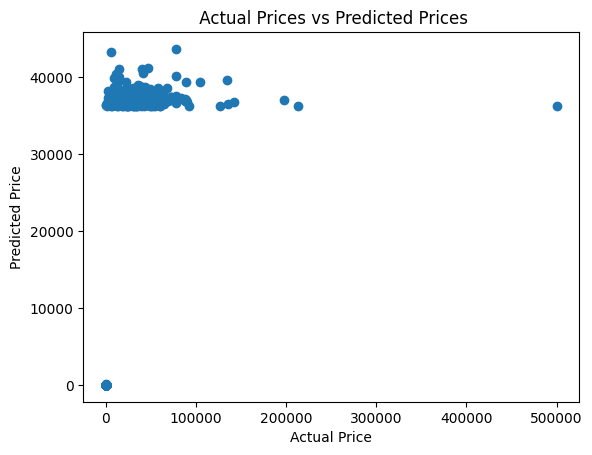

In [43]:
#Train a Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)



RandomForestRegressor(random_state=42)

In [45]:
y_pred_rf = rf_model.predict(X_test.values.reshape(-1, 1))

In [49]:
#Evaluating the Random Forest Model
mse_rf = mean_squared_error(Y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 7385.79989813046


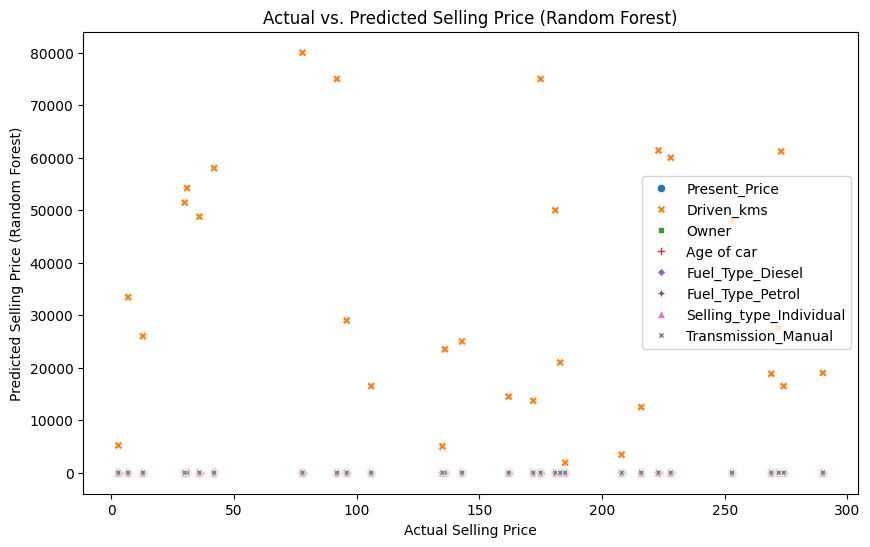

In [57]:
plt.figure(figsize=(10, 6))
# Using the scatterplot() function with one argument
sns.scatterplot(Y_test)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price (Random Forest)')
plt.title('Actual vs. Predicted Selling Price (Random Forest)')
plt.show()